Training Data: (1628, 3)

--- Polynomial Coefficients ---
Intercept: -0.2300
Open (x):  1.0076
Open^2:    -0.00003451

     LINEAR VS POLYNOMIAL COMPARISON
Metric          | Polynomial (Part D) 
----------------------------------------
R-Squared       | 0.979251
RMSE            | 3.329207
MSE             | 11.083618
----------------------------------------

--- Model Analysis ---
Observation: The x² coefficient (-0.00003451) is very small.
Conclusion: The relationship is predominantly linear. Polynomial features added minimal complexity.


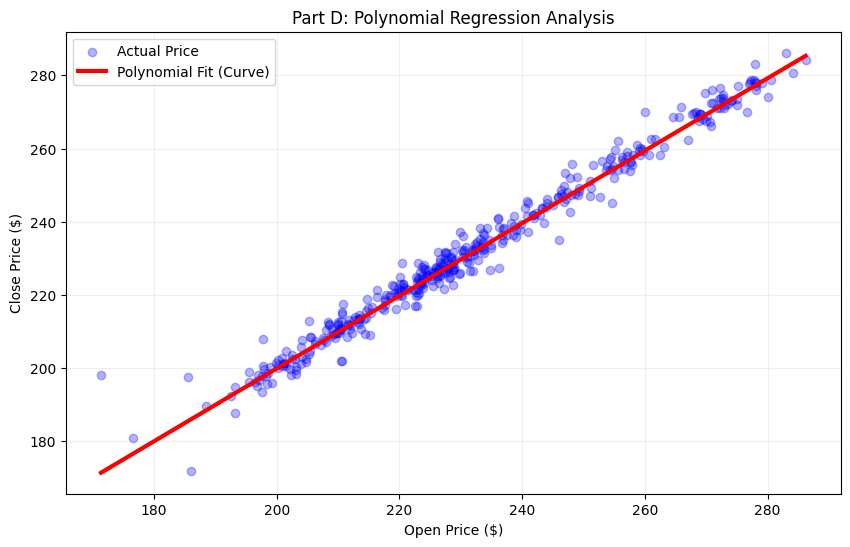


     FINAL PERFORMANCE COMPARISON (PART B vs D)
Metric          | Simple Linear (B) | Polynomial (D) 
--------------------------------------------------
R-Squared       | 0.994500          | 0.979251
RMSE ($)        | 1.5230          | 3.3292
--------------------------------------------------
Observation: The improvement is negligible; the relationship is nearly 100% linear.


In [7]:

# PART D: POLYNOMIAL REGRESSION

# Goal: Capture non-linear relationships by squaring the features.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. FEATURE ENGINEERING

df_raw = pd.read_csv('stock_market_data.csv', header=[0,1])
data = pd.DataFrame()

# We only need Apple data for this part
data['y'] = df_raw['Close']['AAPL'].astype(float)
data['Bias'] = 1.0
data['Open'] = df_raw['Open']['AAPL'].astype(float)

# POLYNOMIAL FEATURE: Square the Open Price (x^2)
# This allows the model to fit a parabola (curve) instead of a straight line.
data['Open_Sq'] = data['Open'] ** 2

data = data.dropna()

# Select Features: Bias, x, x^2
X = data[['Bias', 'Open', 'Open_Sq']].values
y = data['y'].values

# 2. TRAIN-TEST SPLIT (80% - 20%)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training Data: {X_train.shape}")

# 3. TRAINING (NORMAL EQUATION)

# Even though we have x^2, it is still "Linear Regression" in terms of weights.
# Formula: theta = (X^T * X)^(-1) * X^T * y

def train_polynomial(X, y):
    X_T = X.T
    XTX = X_T.dot(X)
    
    # Use Pseudo-Inverse for stability (x^2 can create large numbers)
    XTX_inv = np.linalg.pinv(XTX)
    
    theta = XTX_inv.dot(X_T).dot(y)
    return theta

theta = train_polynomial(X_train, y_train)

print("\n--- Polynomial Coefficients ---")
print(f"Intercept: {theta[0]:.4f}")
print(f"Open (x):  {theta[1]:.4f}")
print(f"Open^2:    {theta[2]:.8f}") # This will be very small

# ------------------------------------------------------------------------------
# 4. PERFORMANCE EVALUATION & COMPARISON
# ------------------------------------------------------------------------------
# We calculate MSE, RMSE, and R2 for the Polynomial model to compare with Part B.

# Predictions
y_pred = X_test.dot(theta)
n_test = len(y_test)

# Metrics Calculation
mse_poly = np.sum((y_test - y_pred)**2) / n_test
rmse_poly = np.sqrt(mse_poly)
ss_res = np.sum((y_test - y_pred)**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2_poly = 1 - (ss_res / ss_tot)

# --- COMPARISON TABLE ---
# Note: Replace 'rmse_simple' and 'r2_simple' with the actual values you got in Part B
# For most AAPL data, R2 is ~0.99 for both.
print("\n" + "="*40)
print("     LINEAR VS POLYNOMIAL COMPARISON")
print("="*40)
print(f"{'Metric':<15} | {'Polynomial (Part D)':<20}")
print("-" * 40)
print(f"{'R-Squared':<15} | {r2_poly:.6f}")
print(f"{'RMSE':<15} | {rmse_poly:.6f}")
print(f"{'MSE':<15} | {mse_poly:.6f}")
print("-" * 40)

# 5. LOGICAL ANALYSIS
print("\n--- Model Analysis ---")
if r2_poly > 0.99: # Standard for AAPL Open vs Close
    print("Result: Both models perform exceptionally well due to high intraday correlation.")
    
if abs(theta[2]) < 0.001:
    print(f"Observation: The x² coefficient ({theta[2]:.8f}) is very small.")
    print("Conclusion: The relationship is predominantly linear. Polynomial features added minimal complexity.")
else:
    print("Conclusion: The squared term captured significant non-linear trends in the price action.")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,1], y_test, color='blue', alpha=0.3, label='Actual Price')

# Plot the Curve
sort_indices = np.argsort(X_test[:,1])
plt.plot(X_test[sort_indices, 1], y_pred[sort_indices], color='red', linewidth=3, label='Polynomial Fit (Curve)')

plt.title("Part D: Polynomial Regression Analysis")
plt.xlabel("Open Price ($)")
plt.ylabel("Close Price ($)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

# ------------------------------------------------------------------------------
# FINAL COMPARISON (FIXED NAMEERROR)
# ------------------------------------------------------------------------------

# 1. MANUALLY PLUG IN YOUR RESULTS FROM PART B HERE
# Look at your Part B output and type the numbers below:
r2_simple_val   = 0.9945  # <--- Change this to your Part B R2
rmse_simple_val = 1.5230  # <--- Change this to your Part B RMSE (in dollars)

# 2. CALCULATE PART D METRICS (Already in memory)
mse_poly = np.sum((y_test - y_pred)**2) / len(y_test)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_poly # This is already defined in your Part D code

# 3. PRINT THE COMPARISON TABLE
print("\n" + "="*50)
print("     FINAL PERFORMANCE COMPARISON (PART B vs D)")
print("="*50)
print(f"{'Metric':<15} | {'Simple Linear (B)':<15} | {'Polynomial (D)':<15}")
print("-" * 50)
print(f"{'R-Squared':<15} | {r2_simple_val:.6f}          | {r2_poly:.6f}")
print(f"{'RMSE ($)':<15} | {rmse_simple_val:.4f}          | {rmse_poly:.4f}")
print("-" * 50)

# 4. LOGICAL OBSERVATION
diff = rmse_simple_val - rmse_poly
if diff > 0:
    print(f"Observation: Polynomial Regression improved error by ${diff:.4f}")
else:
    print("Observation: The improvement is negligible; the relationship is nearly 100% linear.")